# Setup of Noteboook

The follwing code clones the github repository with course files. 
Subsequently it imports all libraries and custom modules needed for this notebook

In [1]:
!git clone https://github.com/DataHow/analytics-course-scripts.git
!pip install --upgrade scipy==1.7.3

Cloning into 'analytics-course-scripts'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 118 (delta 53), reused 96 (delta 31), pack-reused 0
Receiving objects: 100% (118/118), 908.87 KiB | 7.16 MiB/s, done.
Resolving deltas: 100% (53/53), done.
     |████████████████████████████████| 38.1 MB 2.4 MB/s 
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# import libaries
import pandas as pd
import numpy as np
import scipy
import importlib  
import scipy.integrate
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.covariance import EmpiricalCovariance
from scipy.stats import chi2

# import custom modules
emulator = importlib.import_module("analytics-course-scripts.scripts.modules.emulator")
plothelpers = importlib.import_module("analytics-course-scripts.scripts.modules.plothelpers")

# Import or Generate Dataset

In the beginning of each notebook you can make a decision whether you run the notebooks with already pre-generated runs which will be just imported or you will generate your own doe dataset from insilico model. For further information about the process emulator for cell culture fed-batch processes, check the script "00_Process_Characterization.ipynb" or the Powerpoint presentation "Simplified InSilico Model.pptx".

* For dataset import set `select_dataset_source = "import"`.
* For generating data set `select_dataset_source = "generate"`.

For first time running the notebook, we recommend choosing the "import" option.

 

In [3]:
# Select dataset source
select_dataset_source = "import"

In [4]:
if select_dataset_source == "import":
    # Define filename to import
    filename = "owu.csv"
    filepath = "/content/analytics-course-scripts/scripts/datasets/"
    # Import OWU data
    owu = pd.read_csv(filepath+filename,index_col=None, usecols = ["X:VCD", "X:Glc", "X:Lac", "X:Titer","W:Feed"])
    owu.index = pd.MultiIndex.from_product([list(range(int(len(owu)/15))),list(range(15))], names=["run","time"])
    # Import DOE data
    doe = pd.read_csv(filepath+filename.replace(".csv","_doe.csv"),index_col=None, usecols =["feed_start","feed_end","Glc_feed_rate","Glc_0","VCD_0"])

In [5]:
if select_dataset_source == "generate":
    # Model parameters
    mu_g_max = 0.05;
    mu_d_max = 0.025;
    K_g_Glc  = 1;
    K_I_Lac  = 30;
    K_d_Lac  = 50;
    k_Glc    = 0.04;
    k_Lac    = 0.06;
    k_Prod   = 1;

    # Process parameters
    feed_start = [1, 4]
    feed_end = [8, 12]
    Glc_feed_rate = [5, 20]
    Glc_0 = [10, 80.0]
    VCD_0 = [0.1, 1.0]

    var_lims = {"mu_g_max":mu_g_max,"mu_d_max": mu_d_max,"K_g_Glc" : K_g_Glc,"K_I_Lac" : K_I_Lac,"K_d_Lac" : K_d_Lac,"k_Glc" : k_Glc,"k_Lac" : k_Lac,"k_Prod" : k_Prod,"feed_start" : feed_start, "feed_end" : feed_end,"Glc_feed_rate" : Glc_feed_rate, "Glc_0" : Glc_0, "VCD_0" : VCD_0}

    # Define the number of experiments
    num_runs = 50
    # Define the filename for the dataset
    filename = "owu.csv"
    filepath = "/content/"
    # Generate Dataset
    owu = emulator.generate_data(var_lims, num_runs, filename)
    # Import OWU
    owu = pd.read_csv(filepath+filename,index_col=None, usecols = ["X:VCD", "X:Glc", "X:Lac", "X:Titer","W:Feed"])
    owu.index = pd.MultiIndex.from_product([list(range(num_runs)),list(range(15))], names=["run","time"])
    # Import DOE
    doe = pd.read_csv(filepath+filename.replace(".csv","_doe.csv"),index_col=None, usecols =["feed_start","feed_end","Glc_feed_rate","Glc_0","VCD_0"])

# Exploratory Analysis via PCA

*   Why is it important to visualize and understand the data, not only in univariate setting, but also in multivariate?
*   What insights can multivariate analysis provide?
*   What conclusions can be made from PCA on OWU matrix?
*   What conclusions can be made from PCA on BWU matrix?




## OWU and BWU Unfolding

First we need to distinguish between different type of variables and different types of unfolding.

Variable Types:

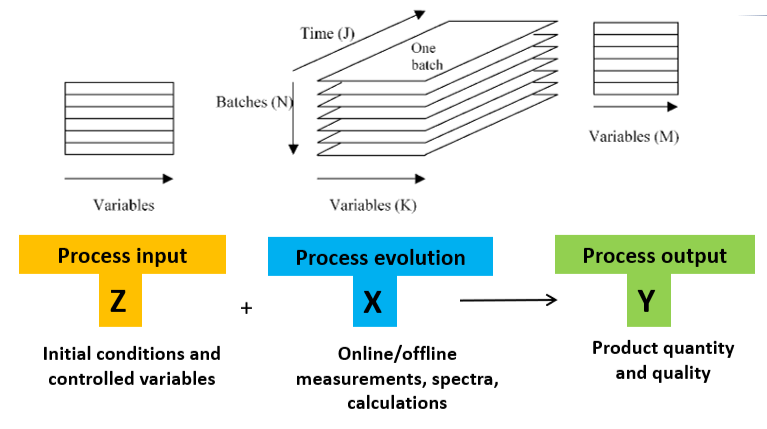

Unfolding types:

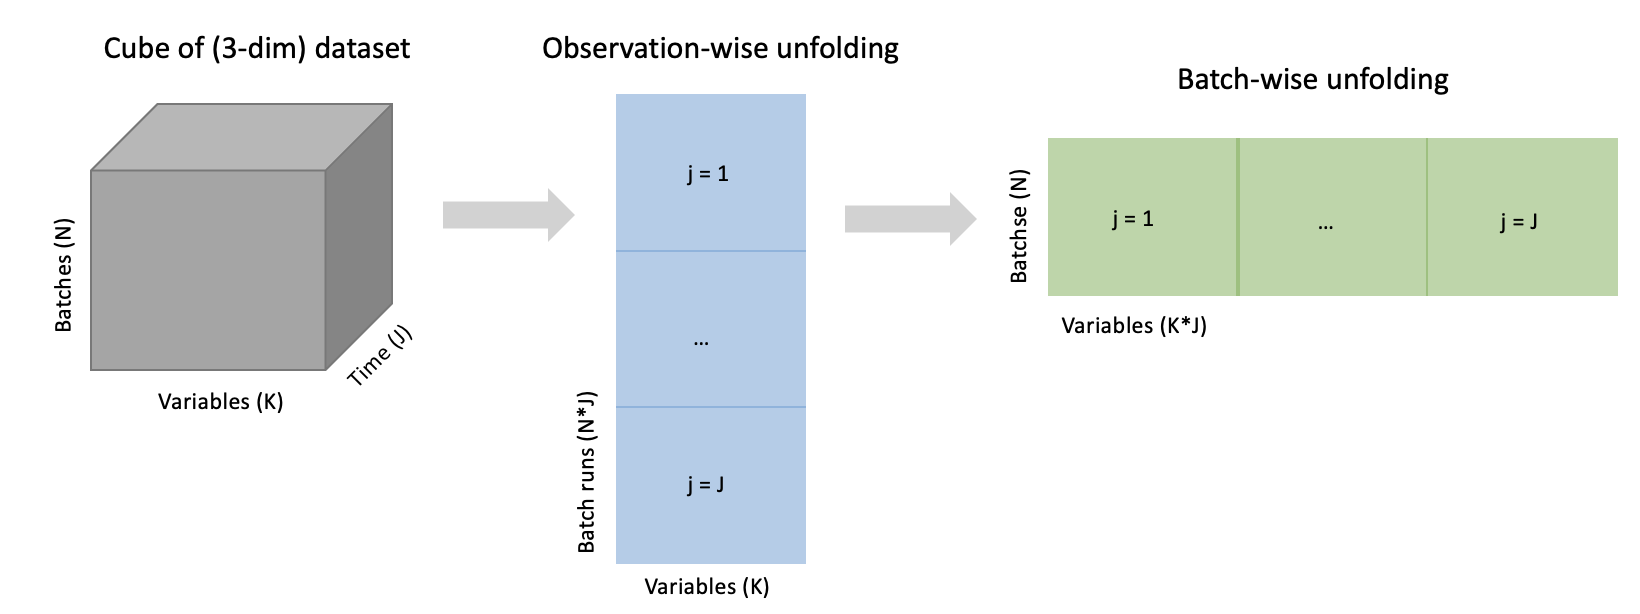

# PCA of OWU matrix

In this section, we use generated experiments using a Latin Hypercube design (LHD) from previous notebook. This will be used to create an observation-wise unfolder (OWU) matrix that will be analyzed using Principle Component Analysis (PCA).


### Visualize the OWU matrix

In the OWU matrix, the 1st column corresponds to VCD, the 2nd to glucose, the 3rd to lactate, the 4th to titer, and the 5th to the feed rate.


In [6]:
owu

X:VCD      X:Glc       X:Lac      X:Titer  W:Feed
run time                                                       
0   0      0.550000  45.000000    0.000000     0.000000     0.0
    1      1.725244  44.008188    1.489389     0.054632     0.0
    2      4.779558  41.089619    5.872389     1.311539    12.5
    3     10.278397  40.271478   16.487303    15.870869    12.5
    4     15.886799  40.083603   35.542541    85.824621    12.5
...             ...        ...         ...          ...     ...
49  10     6.862589  66.962134  146.180650  1078.530371     0.0
    11     4.427064  73.787984  154.252563  1171.208118     0.0
    12     2.799119  70.388990  159.354590  1230.611358     0.0
    13     1.808446  68.216450  162.615752  1268.882113     0.0
    14     1.183911  66.803478  164.736779  1293.894036     0.0

[750 rows x 5 columns]


In the DOE matrix, the 1st column corresponds to feed_start, the 2nd to feed_end, the 3rd to Glc_feed_rate, the 4th to initial Glc, and the 5th to the initial VCD.

In [7]:
doe

,feed_start,feed_end,Glc_feed_rate,Glc_0,VCD_0
0,2.500000,10.000000,12.500000,45.000000,0.550000
1,1.948980,10.244898,18.622449,40.714286,0.274490
2,3.295918,9.346939,14.642857,17.857143,0.127551
3,3.479592,9.020408,15.561224,47.857143,0.843878
4,1.459184,9.591837,7.295918,33.571429,0.421429
5,3.418367,9.265306,8.214286,45.000000,0.403061
6,1.153061,8.448980,17.091837,67.857143,0.862245
7,2.438776,8.122449,14.336735,10.714286,0.898980
8,2.744898,11.551020,9.132653,27.857143,0.292857
9,2.316327,9.183673,5.459184,75.000000,0.256122


### Plot correlation matrix

The OWU matrix is used to plot the degree of correlation between the different variables.

In [8]:
fig = px.imshow(owu.corr())
fig.update_layout(title='Correlation Matrix among X variables')
fig.show()

### Unnormalized PCA

PCA is run on the OWU matrix, but without any variable normalization.



In [46]:
# Select number of components
select_n_components = 5

In [49]:
# Run PCA
owupca = PCA(n_components = select_n_components)
owupca.fit(owu)
owu_expl_var = owupca.explained_variance_
owu_expl_var_ratio = owupca.explained_variance_ratio_
owupca_n_comp = list(range(1,owupca.n_components_+1))

In [50]:
# Explained Variance Plot
fig = px.line(x=owupca_n_comp, y=1-owu_expl_var_ratio, color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=owupca_n_comp, y=owu_expl_var_ratio, name="Individual explained variance")
fig.show()

We can explain 99% of the variance with 1st principal component. Is that correct? Is something else incorrect about this analysis?

### Normalized PCA

PCA is run on the OWU matrix, but this time the variables are first normalized with respect to their mean and standard deviation. This ensures that each variable has equal contribution to the variance explained by the principal components


In [53]:
# Scale data by mean and standard deviation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(owu)

In [54]:
# Run PCA on scaled data
owupca.fit(scaled_data)
owu_expl_var = owupca.explained_variance_
owu_expl_var_ratio = owupca.explained_variance_ratio_
owupca_n_comp = list(range(1,owupca.n_components_+1))
owucomponents = owupca.fit_transform(scaled_data)

In [55]:
# Plot Explained Variance plots
fig = px.line(x=owupca_n_comp, y=1-owu_expl_var_ratio, color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color="Legend"))
fig.add_bar(x=owupca_n_comp, y=owu_expl_var_ratio, name="Individual explained variance")
fig.show()

### Plot scores and loadings

In the following plot, the PCA loadings are plotted together with the observation scores.

You can switch around which principal components are displayed on which axis by changing `select_x_pca` and `select_y_pca`

Here you can also apply same coloring options as in previous script. The options for `select_color` are:
* "Run_id" runs are colored by the order in which they appear in the dataset.
* "Time_id" runs are colored by the time evolution of the cell culture process.
* "Titer_14" runs are colored by the amount of Titer at day 14 or the experiments.
* "Glc_0" run are colored by the designed initial Glucose level
* "VCD_0" run are colored by the designed initial VCD level
* "feed_start" run are colored by the designed feeding start day 
* "feed_end" run are colored by the designed feeding end day
* "Glc_feed_rate" run are colored by the designed Glucose feed rate

In [59]:
# Principal component on x-axis
select_x_pca = 1
# Principal component on y-axis
select_y_pca = 2
# Color plots by
select_color = "Titer_14"
# Highlight run
select_highlight = 2

In [61]:
# Score plot of PCA
if select_color == "Run_id":
    color_idx=owu.index.get_level_values("run")
elif select_color == "Time_id":
    color_idx=owu.index.get_level_values("time")
elif select_color == "Titer_14":
    color_idx =np.repeat(np.array(owu["X:Titer"][:,14]),15)
elif select_color in doe.columns:
    color_idx = np.repeat(np.array(doe[select_color]),15)
else: 
    color_idx = None

array([1560.8227992 , 1560.8227992 , 1560.8227992 , 1560.8227992 ,
       1560.8227992 , 1560.8227992 , 1560.8227992 , 1560.8227992 ,
       1560.8227992 , 1560.8227992 , 1560.8227992 , 1560.8227992 ,
       1560.8227992 , 1560.8227992 , 1560.8227992 ,  852.62757536,
        852.62757536,  852.62757536,  852.62757536,  852.62757536,
        852.62757536,  852.62757536,  852.62757536,  852.62757536,
        852.62757536,  852.62757536,  852.62757536,  852.62757536,
        852.62757536,  852.62757536, 1203.96470485, 1203.96470485,
       1203.96470485, 1203.96470485, 1203.96470485, 1203.96470485,
       1203.96470485, 1203.96470485, 1203.96470485, 1203.96470485,
       1203.96470485, 1203.96470485, 1203.96470485, 1203.96470485,
       1203.96470485, 1582.5466148 , 1582.5466148 , 1582.5466148 ,
       1582.5466148 , 1582.5466148 , 1582.5466148 , 1582.5466148 ,
       1582.5466148 , 1582.5466148 , 1582.5466148 , 1582.5466148 ,
       1582.5466148 , 1582.5466148 , 1582.5466148 , 1582.54661

In [62]:
fig = px.scatter(x=owucomponents[:,select_x_pca-1], y=owucomponents[:,select_y_pca-1], color=color_idx, title="PCA Score plot", labels={'x':"Principal Component - "+str(select_x_pca), 'y':"Principal Component - "+str(select_y_pca), 'color':str(select_color)})    
if select_highlight is not None:
    fig.add_trace(go.Scatter(x=owucomponents[owu.index.get_level_values(0) ==select_highlight,select_x_pca-1],y=owucomponents[owu.index.get_level_values(0) ==select_highlight,select_y_pca-1],name = "Run " +str(select_highlight)))
fig.show()

In [63]:
# Loading plot of PCA
owu_loadings = owupca.components_.T * np.sqrt(owupca.explained_variance_)
owu_features = list(owu.columns)

fig = px.scatter(x=[0,0], y=[0,0], labels={'x':"Principal Component - "+str(select_x_pca), 'y':"Principal Component - "+str(select_y_pca)}, title="PCA Loading plot")
for i, feature in enumerate(owu_features):
    fig.add_shape(type='line', x0=0, y0=0, x1=owu_loadings[i, select_x_pca-1], y1=owu_loadings[i, select_y_pca-1])
    fig.add_annotation(x=owu_loadings[i, select_x_pca-1], y=owu_loadings[i, select_y_pca-1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature)
fig.show()


In [18]:
# Mahalanobis distance of observations (equal to the euclidean distance in PCA space)
emp_cov = EmpiricalCovariance().fit(scaled_data)
mahalanobis = emp_cov.mahalanobis(scaled_data)
T2threshold = chi2.ppf(0.95, scaled_data.shape[1]-1)
fig = px.bar(x=list(range(len(mahalanobis))),y=mahalanobis, labels=dict(x="OWU observation Id.", y="Mahalanobis distance"), title="Mahalanobis distance with 95% Confidence Interval")
fig.add_hline(y=T2threshold)
fig.show()


# PCA of BWU matrix

In the BWU unfolding, the number of rows corresponds to individual experiment runs and each variable like `X:VCD` is unfolded into multiple variables over time, such as `X:VCD:0`, `X:VCD:1`, ..., `X:VCD:14`.



### Visualize the BWU matrix

In the BWU matrix, the 1st column corresponds to VCD at day 0, the 2nd to glucose at day 0, the 3rd to lactate at day 0, the 4th to titer at day 0, and the 5th to the feed rate at day 0. This is repeated for day 1 and the following days. So, column 6 corresponds to VCD at day1, column 7 corresponds to Glc at day1, ..., column 11 corresponds to VCD at day2, etc.

In [19]:
# Transform OWU to BWU
for run_ix,run in owu.groupby("run"):
    if run_ix == 0: 
        bwuindex = run.unstack(level=1)
    else:
        bwuindex = pd.concat([bwuindex, run.unstack(level=1)])
bwu_columns = [str(bwuindex.columns.get_level_values(0)[i])+str(":")+str(bwuindex.columns.get_level_values(1)[i]) for i in range(len(bwuindex.columns.get_level_values(0)))]
bwu = pd.DataFrame(bwuindex.to_numpy(), columns=bwu_columns)

In [20]:
# Visualise BWU matrix
bwu

,X:VCD:0,X:VCD:1,X:VCD:2,X:VCD:3,X:VCD:4,X:VCD:5,X:VCD:6,X:VCD:7,X:VCD:8,X:VCD:9,...,W:Feed:5,W:Feed:6,W:Feed:7,W:Feed:8,W:Feed:9,W:Feed:10,W:Feed:11,W:Feed:12,W:Feed:13,W:Feed:14
0,0.550000,1.725244,4.779558,10.278397,15.886799,18.568089,18.099141,15.811653,12.920362,10.123559,...,12.500000,12.500000,12.500000,12.500000,12.500000,0.000000,0.0,0.0,0.0,0.0
1,0.274490,0.871876,2.589262,6.529319,12.160305,15.860577,15.657798,12.758719,8.910175,5.459967,...,18.622449,18.622449,18.622449,18.622449,18.622449,0.000000,0.0,0.0,0.0,0.0
2,0.127551,0.394527,1.182078,3.245514,7.422644,12.957409,16.940040,17.855081,16.416292,13.883034,...,14.642857,14.642857,14.642857,14.642857,0.000000,0.000000,0.0,0.0,0.0,0.0
3,0.843878,2.609587,6.769304,12.917048,17.673164,18.962614,17.510225,14.783900,11.821098,9.128513,...,15.561224,15.561224,15.561224,15.561224,0.000000,0.000000,0.0,0.0,0.0,0.0
4,0.421429,1.320115,3.754135,8.637166,14.486637,18.036687,18.229667,16.021779,11.657944,7.802797,...,7.295918,7.295918,7.295918,7.295918,0.000000,0.000000,0.0,0.0,0.0,0.0
5,0.403061,1.274492,3.663684,8.505169,14.369815,17.987947,18.241245,16.097973,12.237855,8.262851,...,8.214286,8.214286,8.214286,8.214286,0.000000,0.000000,0.0,0.0,0.0,0.0
6,0.862245,2.674991,6.822434,12.043234,14.253106,12.635555,9.337354,6.164561,3.814842,2.282810,...,17.091837,17.091837,17.091837,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
7,0.898980,2.561678,6.043656,10.256821,14.236500,15.979165,15.381042,13.451839,11.129528,8.774014,...,14.336735,14.336735,14.336735,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
8,0.292857,0.917564,2.680033,6.607004,12.290788,16.780218,18.032878,16.424653,12.328393,8.553837,...,9.132653,9.132653,9.132653,9.132653,9.132653,9.132653,0.0,0.0,0.0,0.0
9,0.256122,0.823632,2.468081,6.202015,11.450645,15.366139,16.636512,15.819700,13.819936,11.400472,...,5.459184,5.459184,5.459184,5.459184,0.000000,0.000000,0.0,0.0,0.0,0.0


### Plot correlation matrix
The BWU matrix is used to plot the degree of correlation between the different variables.


In [21]:
fig = px.imshow(bwu.corr())
fig.update_layout(title='BWU Correlation Matrix among X variables')
fig.show()

### Normalized PCA

PCA is run on the BWU matrix, bu this time the variables are first normalized with respect to their mean and standard deviation.


In [65]:
# Select number of components
select_n_components = 15

In [66]:
# Scale data by mean and standard deviation and run PCA
bwupca = PCA(n_components=min(min(bwu.shape),select_n_components))
scaler = StandardScaler()
scaled_data = scaler.fit_transform(bwu)
bwupca.fit(scaled_data)
bwu_expl_var = bwupca.explained_variance_
bwu_expl_var_ratio = bwupca.explained_variance_ratio_
bwupca_n_comp = list(range(1,bwupca.n_components_+1))
bwu_components = bwupca.fit_transform(scaled_data)

In [68]:
# Plot Explained Variance plots
fig = px.line(x=bwupca_n_comp, y=1-bwu_expl_var_ratio, color=px.Constant("Cumulative explained variance"), labels=dict(x="Principal component index", y="Explained Variance Ratio", color=""))
fig.add_bar(x=bwupca_n_comp, y=bwu_expl_var_ratio, name="Individual explained variance")
fig.show()

### Plot scores and loadings

In the following plot, the PCA loadings are plotted first with the loadings and then without.


In [25]:
# Principal component on x-axis
select_x_pca = 1
# Principal component on y-axis
select_y_pca = 2
# Color plots by
select_color = "Titer_14"

In [69]:
# Score plot of PCA
if select_color == "Run_id":
    color_idx=np.array(bwu.index.get_level_values(0))
elif select_color == "Titer_14":
    color_idx = np.array(owu["X:Titer"][:,14])
elif select_color in doe.columns:
    color_idx = np.array(doe[select_color])
else: 
    color_idx = None
fig = px.scatter(x=bwu_components[:,select_x_pca-1], y=bwu_components[:,select_y_pca-1], color =color_idx, labels={'x':"Principal Component - "+str(select_x_pca), 'y':"Principal Component - "+str(select_y_pca), 'color':str(select_color)}, title="PCA BWU Score plot")
fig.show()

In [70]:
# Loading plot of PCA
bwu_loadings = bwupca.components_.T * np.sqrt(bwupca.explained_variance_)
bwu_features = list(bwu.columns)

fig = px.scatter(x=[0,0], y=[0,0], labels={'x':"Principal Component - "+str(select_x_pca), 'y':"Principal Component - "+str(select_y_pca)}, title="PCA Loading plot")
for i, feature in enumerate(features):
    fig.add_shape(type='line', x0=0, y0=0, x1=bwu_loadings[i, select_x_pca-1], y1=bwu_loadings[i, select_y_pca-1])
    fig.add_annotation(x=bwu_loadings[i, select_x_pca-1], y=bwu_loadings[i, select_y_pca-1], ax=0, ay=0, xanchor="center", yanchor="bottom", text=feature)
fig.show()


In [28]:
# Select which loading to plot
select_x_pca = 1

In [71]:
# Loading plot of PCA alternative
bwu_loadings = bwupca.components_.T * np.sqrt(bwupca.explained_variance_)
bwu_loading = bwu_loadings[:,select_x_pca-1]
bwu_features = list(bwu.columns)

fig = px.bar(x=bwu_features, y=bwu_loading,labels={'x':"Variable", 'y':"Loading of PC - "+str(select_x_pca)}, title="PCA Loading plot")
fig.show()

# Tasks: 

1. How would you use the pca analysis to find high Titer experiments.
2. Compute Mahalanobis distances on BWU matrix.
3. Normalize data by median VCD and run PCA on OWU matrix.



